# Set up Instruction
### 1. Install all applicable libraries you will need (e.g., Pandas, NumPy, sklearn, xgboost, etc.) 

In [2]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #This library is built on matplotlib with enhanced graphing capabilities
from statsmodels.tsa.stattools import adfuller #adding this library to conduct adfuller tests
from statsmodels.tsa.stattools import acf
from numpy import log
import time
import gc
import warnings
from scipy.stats import uniform, randint

#machine learning libraries

# Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, ConfusionMatrixDisplay, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb

import sys

warnings.filterwarnings("ignore")

#### 2. Download the Airline Passenger Satisfaction data (“airline_satisfaction.csv”) from Blackboard (Coursework>Weekly Lecture Notebooks> Week 11). 

### 3. Read the airline_satisfaction.csv data into your notebook/workspace as a data framework (e.g., df). 

In [3]:
# df = pd.read_csv(r"C:\Users\joakh\OneDrive\IE 592 Case Studies\GASREGCOVW.csv")
df = pd.read_csv(r"C:\Users\joakh\OneDrive\IE 592 Case Studies\airline_satisfaction.csv")

### 4. Display the number of rows and columns in the data. 

In [84]:
size = df.shape
print ("Shape of the data set is :", size)



Shape of the data set is : (129880, 24)


### 5. Display the first five rows of the dataset to confirm that the import was successful. 

In [85]:
df.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


# Data cleaning and preparation

### 1. Identify if there are duplicated observations. Remove observations with duplicate values, if any 

In [86]:
duplicate_check = df.duplicated()
duplicate_check

0         False
1         False
2         False
3         False
4         False
          ...  
129875    False
129876    False
129877    False
129878    False
129879    False
Length: 129880, dtype: bool

In [87]:
duplicate_check.sum()

0

#### *There are no duplicate in the data set* 

### 2. Identify if there are missing/null values and display number of missing values per column 

In [88]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

#### Arrival Delay in Minutes Attribute has some missing value, which would be replaced with the mean of the attribute

In [89]:
mean_value = df["Arrival Delay in Minutes"].mean()
df["Arrival Delay in Minutes"].fillna(value=mean_value, inplace=True)

### *Validating that there are no more missing values*

In [90]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### 3. Drop ‘id’ column since it is not relevant to the analysis or model development 

In [91]:
df.columns


Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

#### *Creating a new data frame dropping initial id attribute*

In [92]:
df_1 = df.drop('id', axis=1)
df_1

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


### 4. Convert target variable ‘satisfaction’ values to a binary variable: ‘satisfied’ (= 1) and ‘neutral or dissatisfied’ (= 0)  

In [93]:

df_1.satisfaction.replace(('satisfied', 'neutral or dissatisfied'), (1, 0), inplace=True) 
df_1

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


# Descriptive analysis

### 5. Estimate the descriptive statistics (count, mean, standard deviation, p0, p25, p50, p75, p100). Describe the results observed in the notebook as markdown text 

In [94]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


In [95]:
#Data Type
df_1.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

#### *The dataset provides a summary of feedback from 129,880 passengers about their experience during an airline journey. The review incorporates ratings for 23 attributes, encompassing factors such as age, travel distance, facilities available on board (such as internet, food, and beverages), quality of service given by the airline (including boarding, check-in, and luggage handling), seat comfort, entertainment options, arrival, and departure delays, and overall satisfaction with the flight.*

* Age: The mean age of passengers is around 39.43 years, with a standard deviation of 15.12. The minimum age of a passenger is 7, while the maximum age is 85.
* Flight Distance: The flight distance has an average of roughly 1190.32 miles, with a standard variation of 997.45. The minimum distance for a flight is 31 miles, while the maximum distance is 4983 miles.
* The majority of passengers rated most in-flight services, such as internet service, convenience of online booking, gate location, food and drinks, online boarding, and seat comfort, with an average score of 3 out of 5.
* The evaluations for Check-in service, Inflight service, and Baggage handling averaged 3.63 out of 5, indicating a somewhat greater level of satisfaction.
* The dataset also contains statistics on the delays in departures and arrivals. The mean departure delay was 14.7 minutes, while the mean arrival delay was 15.1 minutes.
* Satisfaction: This column denotes whether the traveler expressed satisfaction (1) or dissatisfaction (0) with their entire trip experience. The statistics indicates that around 43.45% of passengers expressed satisfaction.

### 6. Identify and list which variables are numerical (as numeric_cols) and which variables are categorical (as categorical_cols) 

In [96]:
#identifying which variables are numerical or categorical
numeric_cols = df_1.columns[df_1.dtypes != object]
categorical_cols = df_1.columns[df_1.dtypes == object]

#### *Numerical_cols*

In [97]:
numeric_cols

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

#### *Categorical_cols*

In [152]:
categorical_cols

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

### 7. Create the box-plot the numerical variables grouped by target variable ‘satisfaction’ 

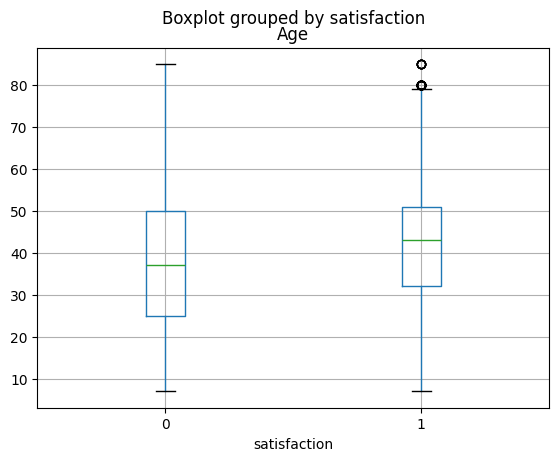

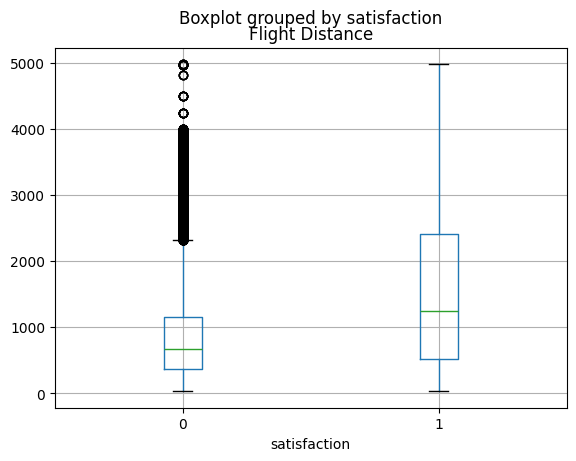

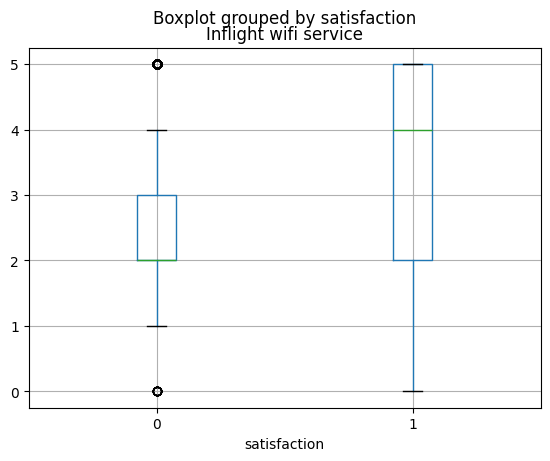

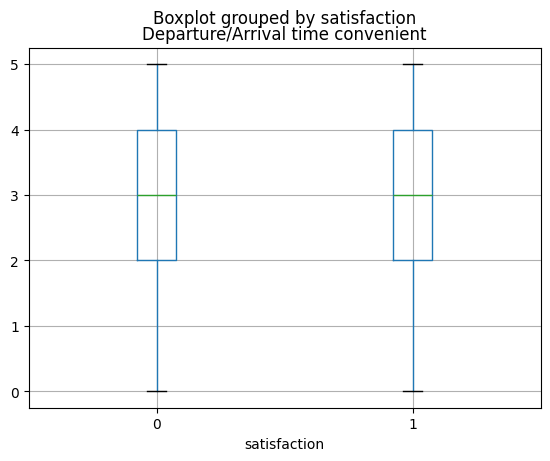

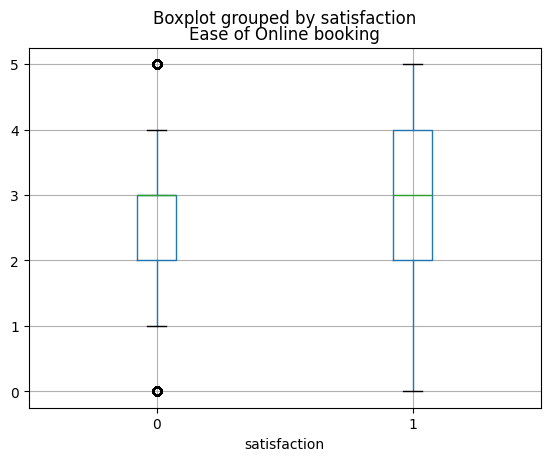

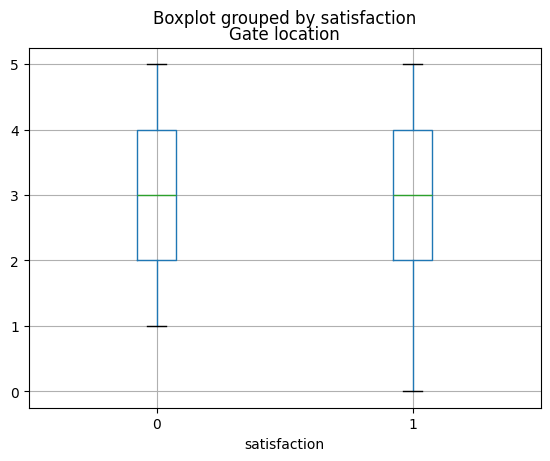

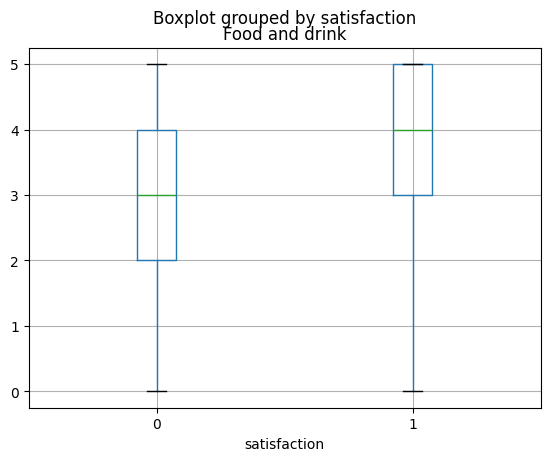

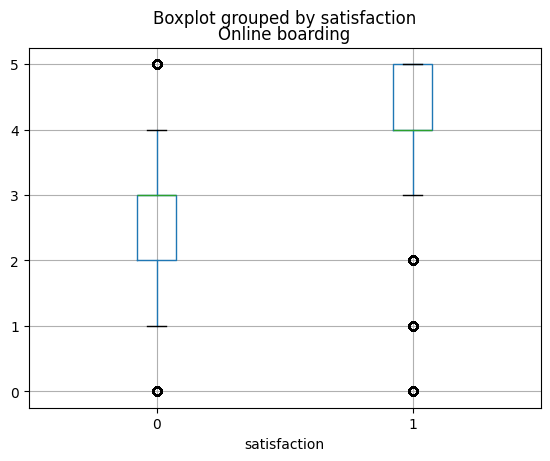

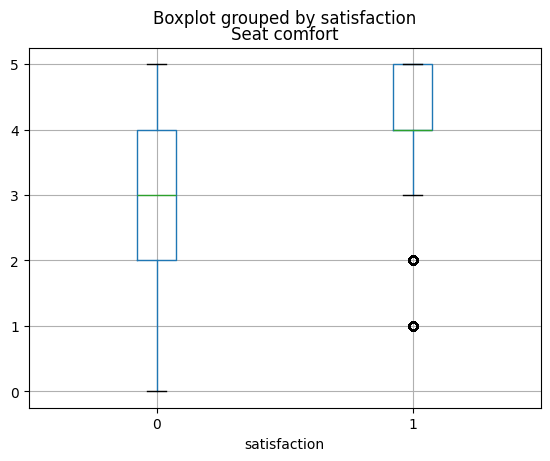

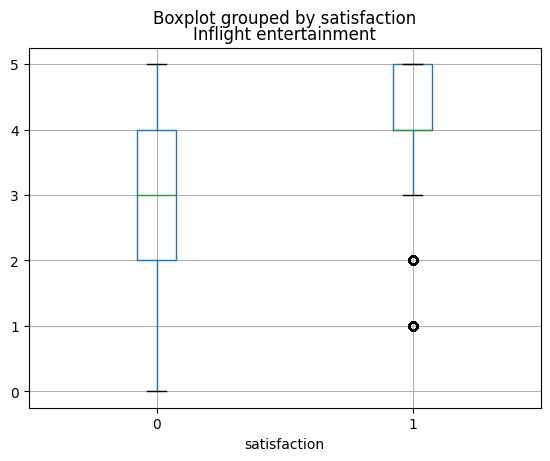

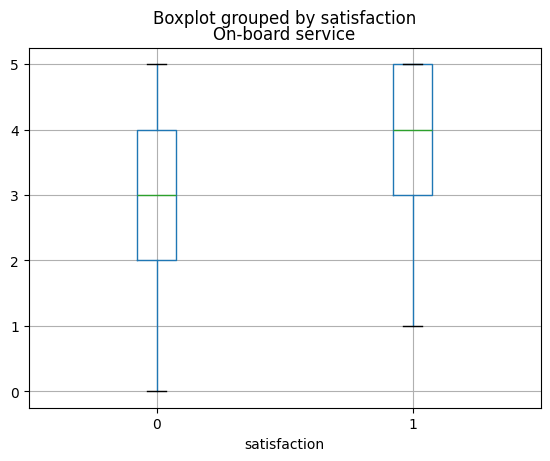

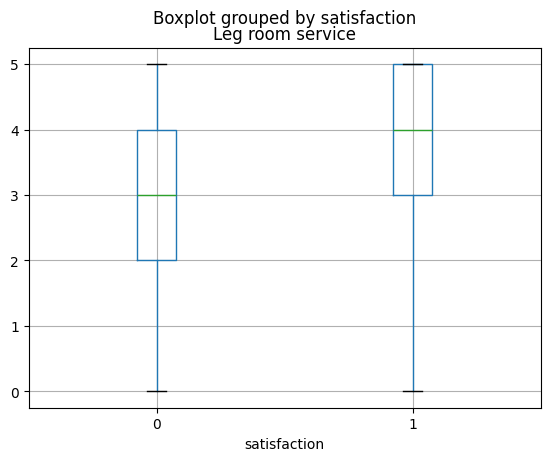

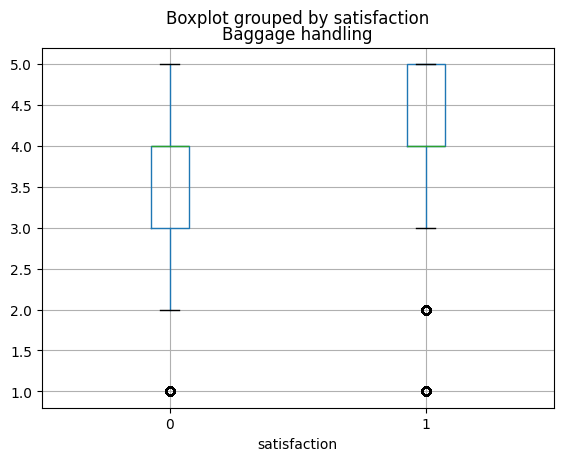

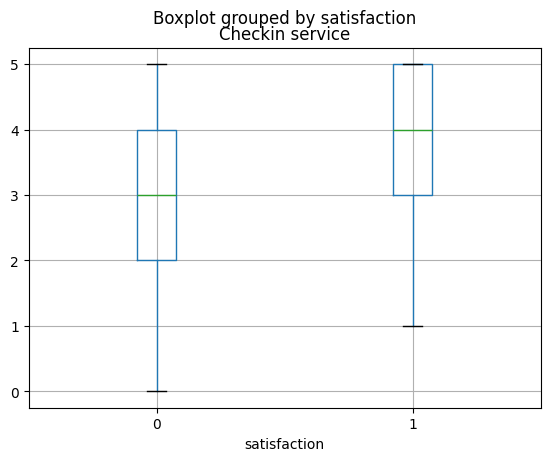

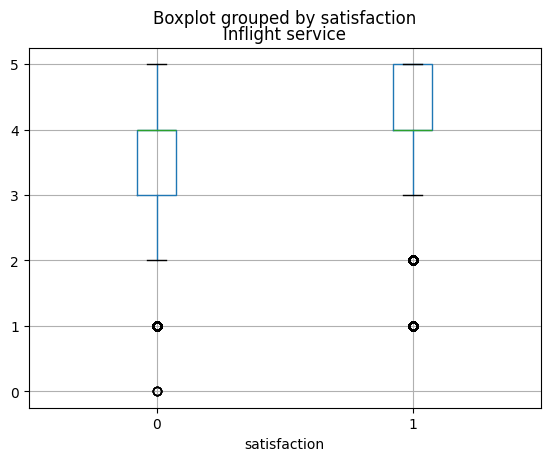

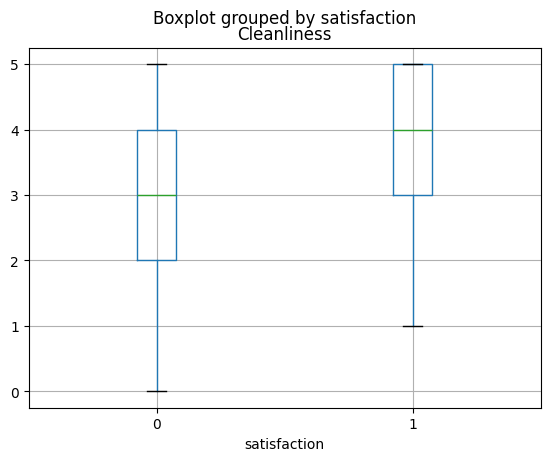

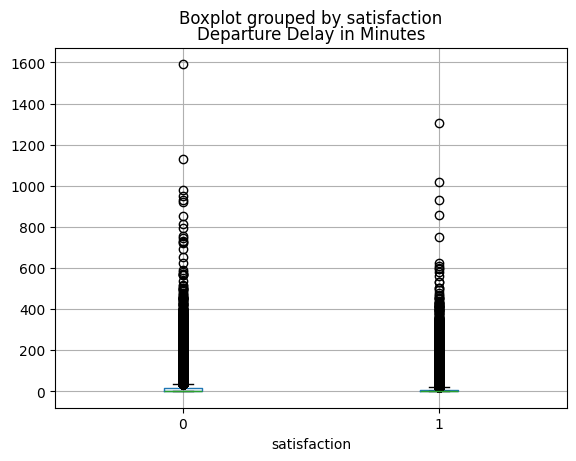

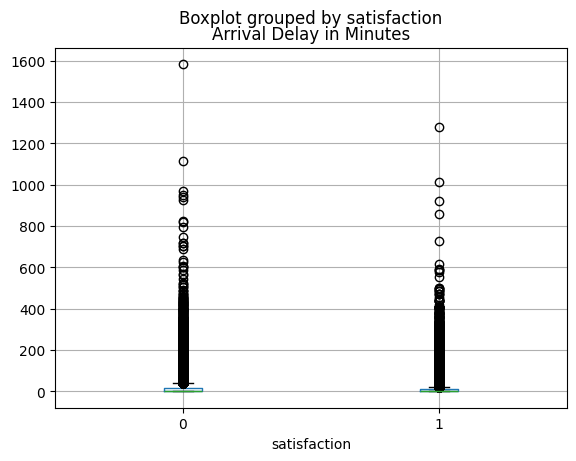

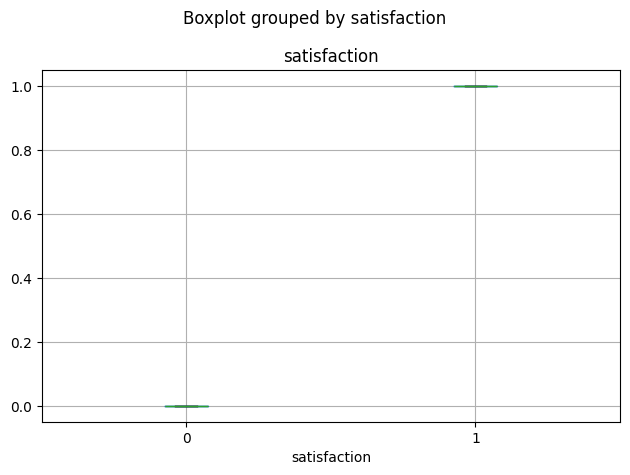

In [153]:
for col in (numeric_cols):
  df_1.boxplot(col, by='satisfaction')

plt.tight_layout()

plt.show()

### 8. Plot the bar plot for the categorical variable relative frequency grouped by target variable ‘satisfaction’ 

In [154]:
for col in (categorical_cols):
  print("Variable name: ", col)
  print(df_1[col].value_counts())
  print("********************")

Variable name:  Gender
Gender
Female    65899
Male      63981
Name: count, dtype: int64
********************
Variable name:  Customer Type
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64
********************
Variable name:  Type of Travel
Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64
********************
Variable name:  Class
Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64
********************


In [155]:
# Build a function to show categorical values disribution
def plot_bar(column):
    # temp df
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['dissatisfied'] = df_1[df_1['satisfaction'] == 0][column].value_counts(normalize=True)
    temp_1['satisfied'] = df_1[df_1['satisfaction'] == 1][column].value_counts(normalize=True)
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of customers')
    plt.title('Distribution of {}'.format(column))
    plt.show();
# 'satisfied', 'neutral or dissatisfied'


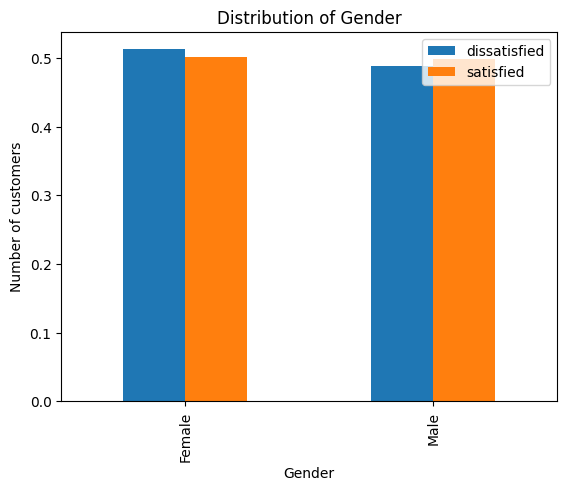

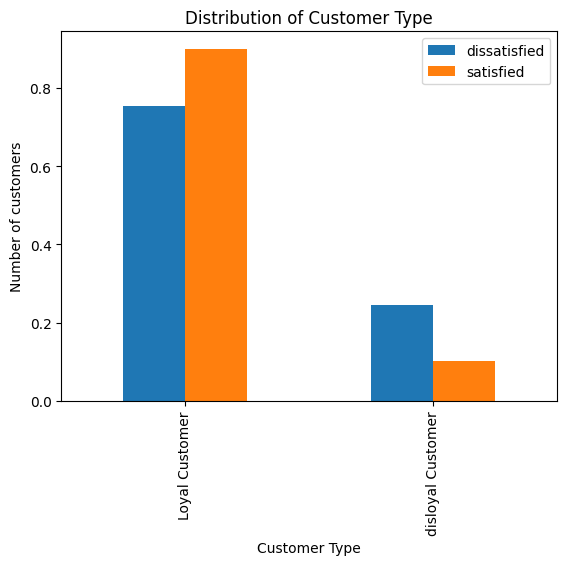

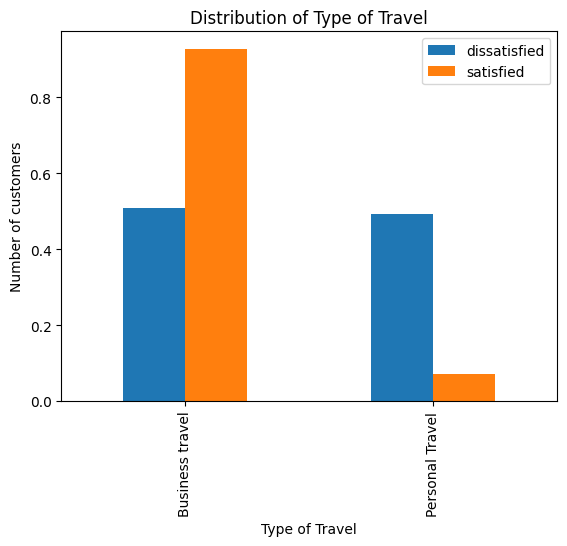

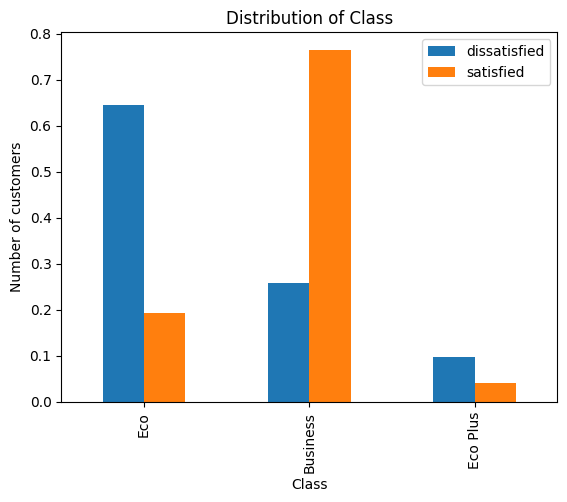

In [156]:
plot_bar('Gender'), plot_bar('Customer Type'), plot_bar('Type of Travel'), plot_bar('Class');


In [157]:
# Convert target variable into numeric
# df.satisfaction = df.satisfaction.map({'neutral or dissatisfied':0, 'satisfied':1}).astype('uint8')
df.satisfaction = df_1.satisfaction.map({0:0, 1:1}).astype('uint8')


In [158]:
df_1['satisfaction']

0         0
1         0
2         1
3         0
4         1
         ..
129875    0
129876    1
129877    0
129878    1
129879    0
Name: satisfaction, Length: 129880, dtype: uint8

### 9. Display the correlation between the variables and the target variable ‘satisfaction’ 

In [252]:
numeric_df = df_1.select_dtypes(include=['number'])
corr = numeric_df.corr().fillna(0)
corr.style.background_gradient(cmap='PuBu')

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Age,1.000000,0.099459,0.016116,0.036960,0.022565,-0.000398,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.009041,-0.011229,0.134091
Flight Distance,0.099459,1.000000,0.006701,-0.018914,0.065165,0.005520,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,0.002402,-0.001932,0.298085
Inflight wifi service,0.016116,0.006701,1.000000,0.344915,0.714807,0.338573,0.132214,0.457445,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.015946,-0.017721,0.283460
Departure/Arrival time convenient,0.036960,-0.018914,0.344915,1.000000,0.437620,0.447510,0.000687,0.072287,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000778,-0.000941,-0.054270
Ease of Online booking,0.022565,0.065165,0.714807,0.437620,1.000000,0.460041,0.030514,0.404866,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005318,-0.007022,0.168877
Gate location,-0.000398,0.005520,0.338573,0.447510,0.460041,1.000000,-0.002872,0.002756,0.002788,0.002741,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.005973,0.005649,-0.002793
Food and drink,0.023194,0.057066,0.132214,0.000687,0.030514,-0.002872,1.000000,0.233500,0.575846,0.623461,0.057404,0.033173,0.035321,0.085198,0.035210,0.658054,-0.029164,-0.031666,0.211340
Online boarding,0.207572,0.214825,0.457445,0.072287,0.404866,0.002756,0.233500,1.000000,0.419253,0.283922,0.154242,0.123225,0.083541,0.204238,0.074058,0.329377,-0.019404,-0.022694,0.501749
Seat comfort,0.159136,0.157662,0.121513,0.008666,0.028561,0.002788,0.575846,0.419253,1.000000,0.611837,0.130545,0.104272,0.074620,0.189979,0.068842,0.679613,-0.027999,-0.030472,0.348829
Inflight entertainment,0.074947,0.130507,0.207802,-0.008380,0.046564,0.002741,0.623461,0.283922,0.611837,1.000000,0.418574,0.300397,0.379123,0.119554,0.406094,0.692511,-0.027012,-0.030187,0.398234


### 10. *Elaborate your initial hypothesis for which variables appear to have a significant impact on the target variable, based on the results from 7,8 and 9. You need to provide your insights and summarize them in the notebook to get credit*

#### *The box plot indicates that certain variables, such as Departure/Arrival time, Gate Location, Food, Leg Room Services, Check-in Services, and cleanliness, are positively correlated with the target variable (satisfaction). These variables show satisfaction levels between the first quartile (Q1) and third quartile (Q3) without any outliers. Variables such as Age, Flight Distance, Inflight Wi-Fi services, Online boarding, seat comfort, flight entertainment, Baggage handling, Flight service, and Arrival Delay exhibit outliers beyond the interquartile range (IQR), suggesting a need for further investigation to enhance customer satisfaction.*

#### *When examining the distribution bar chart data, both genders show comparable proportions of satisfied and dissatisfied consumers in the Gender category. Gender has no major impact on customer satisfaction in this case. Examining the distribution of content and discontent clients categorized by the purpose of travel, either business or personal. Business travelers exhibit a greater satisfaction rate compared to personal travelers. When categorized by Flight Class, the Economic Class exhibits a higher proportion of unhappiness compared to other classes, whereas the Business class displays a higher proportion of satisfaction rating. Loyal clients are more satisfied with the services compared to disloyal customers.*

#### *Online boarding shows the highest satisfaction correlation in the correlation table. Inflight entertainment, on-boarding services, legroom services, and cleanliness also have a positive correlation with satisfaction. However, departure delay, departure/arrival time, gate location, and arrival delay do not correlate with satisfaction.*


# Machine Learning modeling data prep

### 11. Conduct the one-hot encoding of the categorical variables of the model ('Gender', 'Customer Type', 'Type of Travel', 'Class')

In [160]:
categorical_cols

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [161]:
# make a copy of dataset to scaling
airline_satisfaction = df.copy()
# remove 'id' column - we choose to do this since these variables values don't make a lot sense
airline_satisfaction= airline_satisfaction.drop('id', axis=1)
airline_satisfaction.satisfaction.replace(('satisfied', 'neutral or dissatisfied'), (1, 0), inplace=True) 
feature_scale=[feature for feature in airline_satisfaction.columns if feature not in categorical_cols]
scaler=StandardScaler()
scaler.fit(airline_satisfaction[feature_scale])

# ---------------------------------------
# 'satisfied', 'neutral or dissatisfied'
# df_1.satisfaction.replace(('satisfied', 'neutral or dissatisfied'), (1, 0), inplace=True)

# feature_scale=[feature for feature in df_1.columns if feature not in categorical_cols]
# scaler=StandardScaler()
# scaler.fit(df_1[feature_scale])

StandardScaler()

In [162]:
#standarizing the data and joining
# Note: categorical_cols1 is the same as categorical_cols, but excluding the y target variable
categorical_cols1= ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
scaled_data = pd.concat([airline_satisfaction[categorical_cols1].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(airline_satisfaction[feature_scale]), columns=feature_scale)],
                    axis=1)

# # one-hot encoding
categorical_cols1= ['Gender', 'Customer Type', 'Type of Travel', 'Class']
scaled_data= pd.get_dummies(scaled_data, columns = categorical_cols1, drop_first=True)
scaled_data.head()


#----------------------
# categorical_cols1= ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# scaled_data = pd.concat([df_1[categorical_cols1].reset_index(drop=True),
#                     pd.DataFrame(scaler.transform(df_1[feature_scale]), columns=feature_scale)],
#                     axis=1)


# one-hot encoding
# categorical_cols1= ['Gender', 'Customer Type', 'Type of Travel', 'Class']
# scaled_data= pd.get_dummies(scaled_data, columns = categorical_cols1, drop_first=True)
# scaled_data.head()

,satisfaction,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0,-1.747961,-0.732184,0.204090,0.617265,0.173445,-1.546267,1.349867,-0.187037,1.181428,...,1.153946,1.304487,0.270187,0.075738,-0.876487,True,False,True,False,True
1,0,-0.954274,-0.957760,0.204090,-0.692719,0.173445,0.018048,-1.657814,-0.187037,-1.850520,...,0.304086,-1.740402,-0.360214,-0.236703,-0.876487,True,True,False,False,False
2,1,-0.888133,-0.048440,-0.548166,-0.692719,-0.539957,-0.764109,1.349867,1.293662,1.181428,...,0.304086,1.304487,-0.386481,-0.392924,1.140918,False,False,False,False,False
3,0,-0.954274,-0.629924,-0.548166,1.272257,1.600249,1.582364,-0.905894,-0.927386,-1.092533,...,0.304086,-0.979180,-0.097547,-0.158593,-0.876487,False,False,False,False,False
4,1,1.426788,-0.978814,0.204090,-0.037727,0.173445,0.018048,0.597947,1.293662,1.181428,...,-0.545774,-0.217958,-0.386481,-0.392924,1.140918,True,False,False,False,False


In [163]:
scaled_data.columns

Index(['satisfaction', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

### 12. Split dataset into:  X (features or independent variables) and Y (target or dependent variable) 

In [164]:
X = scaled_data.iloc[:,1:]
Y = scaled_data.iloc[:,0]

print(X.head(5))
print("***********")
print(Y.head(5))

        Age  Flight Distance  Inflight wifi service  \
0 -1.747961        -0.732184               0.204090   
1 -0.954274        -0.957760               0.204090   
2 -0.888133        -0.048440              -0.548166   
3 -0.954274        -0.629924              -0.548166   
4  1.426788        -0.978814               0.204090   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                           0.617265                0.173445      -1.546267   
1                          -0.692719                0.173445       0.018048   
2                          -0.692719               -0.539957      -0.764109   
3                           1.272257                1.600249       1.582364   
4                          -0.037727                0.173445       0.018048   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  ...  \
0        1.349867        -0.187037      1.181428                1.230787  ...   
1       -1.657814        -0.1870

### 13. Split the datasets into X_train, X_test, y_train, and y_test. Use a train-test random split of %80-%20. For the random_state, use the last three digit of your student id 

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=416)

In [166]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(103904, 24)
(25976, 24)
(103904,)
(25976,)


# Random Forest

In [167]:
categorical_cols

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

### 14. Random Forest (RF) model development and optimization: 

#### *a. Develop a baseline random forest model (using default parameters) using library sklearn. ensemble and module RandomForestClassifier()*

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [169]:
y_pred = rf_clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [170]:
y_pred_train = rf_clf.predict(X_train)
y_pred_train

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)

#### *b. Estimate the model accuracy on the train sample and test sample*

In [171]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy on train:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy on test:",metrics.accuracy_score(y_test, y_pred))

Accuracy on train: 1.0
Accuracy on test: 1.0


### *Decision Tree Picture*

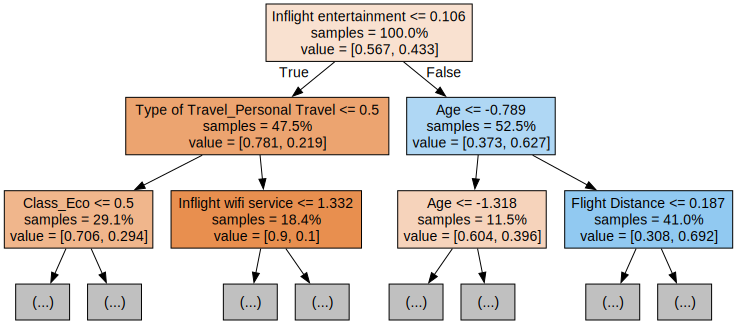

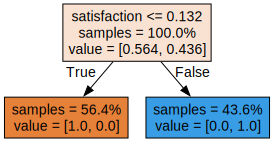

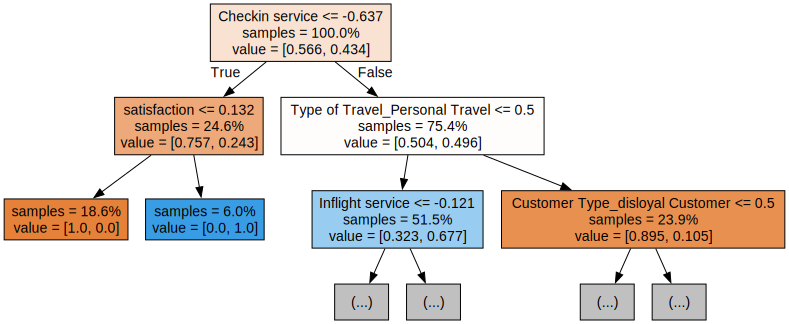

In [172]:
# Export the first three decision trees from the forest
# Tree Visualisation

#after installing, find where the graphviz files are in your computer
#C:/Users/flore/anaconda3/Library/bin/graphviz
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Users/flore/anaconda3/Library/bin/graphviz/'



from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
    tree = rf_clf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### c. Estimate the precision, recall and f1-score on the test sample 

In [173]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("The precision for Tree is ",precision_score(y_test, y_pred))
print("The recall for Tree is ",recall_score(y_test, y_pred))

[[14697     0]
 [    0 11279]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14697
           1       1.00      1.00      1.00     11279

    accuracy                           1.00     25976
   macro avg       1.00      1.00      1.00     25976
weighted avg       1.00      1.00      1.00     25976

The precision for Tree is  1.0
The recall for Tree is  1.0


### *d. Optimize the model by conducting hyperparameter tuning using*

In [256]:
# param_dist = {'n_estimators': randint(50,500),
#               'max_depth': randint(1,20)}

# Tuning parameter for RF ( tuning parameters are choosen based on best parameters of RandomizedSearchCV)
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
min_samples_split = [5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
tuning_rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=416, n_jobs = -1, scoring='roc_auc')
tuning_rf.fit(X_train,y_train)
print('Best Parameter for Random Forest', tuning_rf.best_params_, tuning_rf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameter for Random Forest {'n_estimators': 234, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23} 1.0


In [257]:
# Create a variable for the best model
best_rf = tuning_rf.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  tuning_rf.best_params_)

Best hyperparameters: {'n_estimators': 234, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}


### e. Estimate the model accuracy on the train sample and test sample 

In [258]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy on train:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy on test:",metrics.accuracy_score(y_test, y_pred))

Accuracy on train: 1.0
Accuracy on test: 1.0


### f. Estimate the precision, recall and f1-score on the test sample 

In [259]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("The precision for Tree is ",precision_score(y_test, y_pred))
print("The recall for Tree is ",recall_score(y_test, y_pred))

[[14697     0]
 [    0 11279]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14697
           1       1.00      1.00      1.00     11279

    accuracy                           1.00     25976
   macro avg       1.00      1.00      1.00     25976
weighted avg       1.00      1.00      1.00     25976

The precision for Tree is  1.0
The recall for Tree is  1.0


### g. Create the confusion matrix 

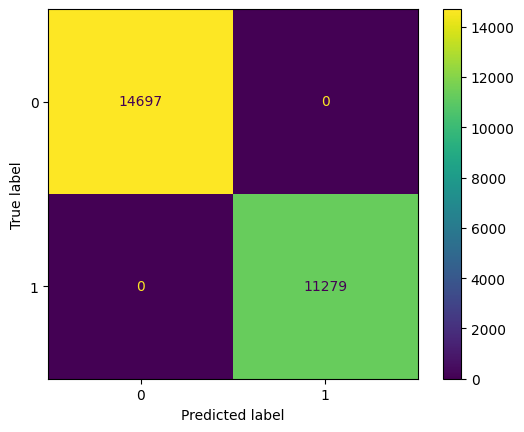

In [260]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### h. Calculate the ROC curve and estimate the AUC 

RF: ROC AUC=1.000


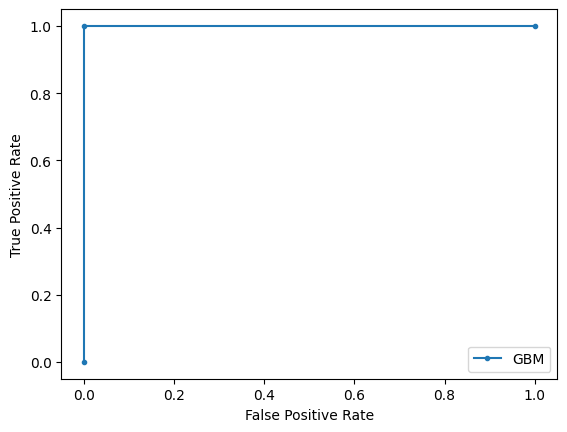

In [261]:
rf_auc = roc_auc_score(y_test, y_pred)
# summarize scores
print('RF: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot(rf_fpr, rf_tpr, marker='.', label='GBM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### i. Plot feature/variable importance 

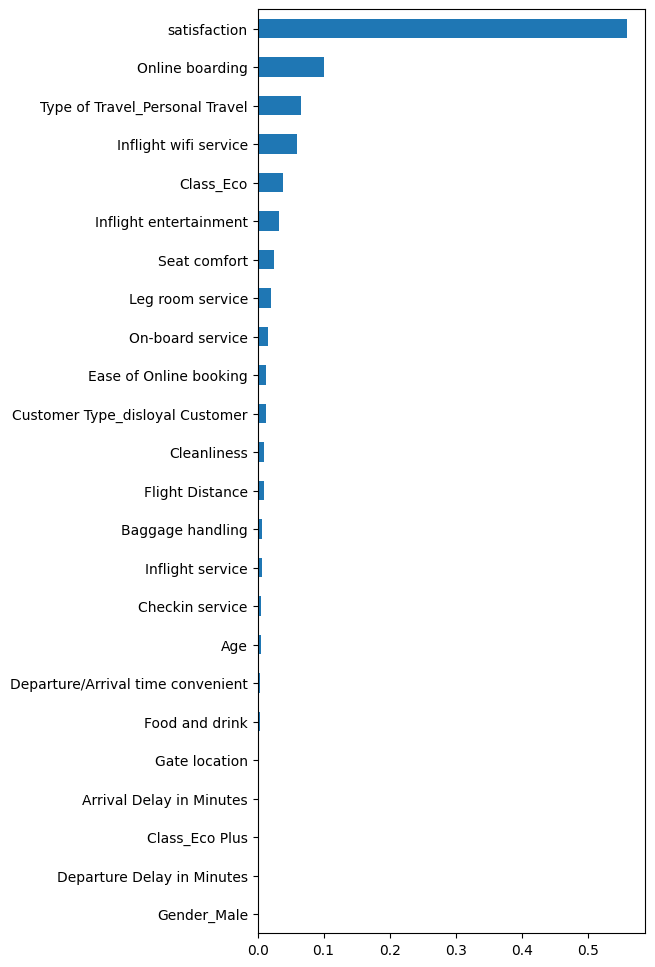

In [262]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=True)

# Plot a simple bar chart
plt.figure(figsize=(5,12))
feature_importances.plot.barh();

### j. Provide a description of the results observed (i.e., performance results, improvement of optimized model over baseline model, parameters used for optimization, final best hyperparameters selected, variable importance, etc.) 

#### The Random Forest model has a training and test accuracy of 1.0 (100%), indicating that it accurately predicts outcomes for the training data and performs well on unknown test data.
#### The precision, recall, and f1 score in the analyses are all 1.0, indicating remarkable performance of the model in distinguishing positive and negative cases.

#### The confusion matrix represents the performance of a classification model.

* True Positives (TP): The model correctly predicted 11,279 instances as positive.
* True Negatives (TN): The model correctly predicted 14,697 instances as negative.
* False Positives (FP): There were 0 instances incorrectly predicted as positive.
* False Negatives (FN): There were 0 instances incorrectly predicted as negative.

*The model achieved perfect accuracy because it made no mistakes in its predictions.*

#### Also, An ROC AUC of 1.000 suggests that the model’s predictions are flawless.

#### This hyperparameter specifies the quantity of decision trees within the random forest ensemble. The optimal value is 234, the model will combine 234 separate decision trees.

#### Online boarding has the most substantial beneficial impact on customer satisfaction. Additional features such as personal travel type and in-flight wifi service have a lower impact on satisfaction, while certain variables show no significant influence.



# 15. Gradient Boosting Machines (GBM) model development and optimization

### a. Develop baseline GBM model (using default parameters) using library sklearn. ensemble and module GradientBoostingClassifier

In [263]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

### b. Estimate the model accuracy on the train sample and test sample 

In [264]:
print("X sample: ",len(X))
print("Y sample: ",len(Y))
print("X train sample: ",len(X_train))
print("X test sample: ",len(X_test))
print("y train sample: ",len(y_train))
print("y train sample: ",len(y_test))

X sample:  129880
Y sample:  129880
X train sample:  103904
X test sample:  25976
y train sample:  103904
y train sample:  25976


In [265]:
categorical_cols1


['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [266]:
numeric_cols


Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [267]:
gbm_clf = GradientBoostingClassifier()
gbm_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [268]:
gbm_clf.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [269]:
y_pred


array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [270]:
y_pred_train


array([0, 0, 1, ..., 0, 0, 1])

### c. Estimate the precision, recall and f1-score on the test sample 

In [271]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("The precision for Tree is ",precision_score(y_test, y_pred))
print("The recall for Tree is ",recall_score(y_test, y_pred))

[[14697     0]
 [    0 11279]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14697
           1       1.00      1.00      1.00     11279

    accuracy                           1.00     25976
   macro avg       1.00      1.00      1.00     25976
weighted avg       1.00      1.00      1.00     25976

The precision for Tree is  1.0
The recall for Tree is  1.0


### d. Optimize the model by conducting hyperparameter tuning

In [272]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

parameters = {
    "learning_rate": uniform(0.01, 1), # default 0.1
    "min_samples_split": np.linspace(0.1, 1.0, 10),
    "min_samples_leaf": np.linspace(0.1, 1.0, 10),
    "max_depth": randint(2, 10), # default 3
    "n_estimators": randint(100, 500), # default 100
    "subsample": uniform(0, 1),
}

tuning_gbm = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions=parameters, random_state=416, n_iter=50, cv=5, verbose=1, n_jobs=1, return_train_score=True)

tuning_gbm.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=50,
                   n_jobs=1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000263DF9C5E90>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000263DF96DE50>,
                                        'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000263DFAC2910>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000263DF417750>},
                   random_state=416, return_train_score=True, verbose=1)

In [273]:
y_pred = tuning_gbm.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [274]:
print('Best Parameter for GBM', tuning_gbm.best_params_, tuning_gbm.best_score_)


Best Parameter for GBM {'learning_rate': 0.8302207790351965, 'max_depth': 5, 'min_samples_leaf': 0.30000000000000004, 'min_samples_split': 0.4, 'n_estimators': 198, 'subsample': 0.8777191593306456} 1.0


In [275]:
tuning_gbm.best_score_


1.0

In [276]:
# Create a variable for the best model
best_gbm = tuning_gbm.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  tuning_gbm.best_params_)

Best hyperparameters: {'learning_rate': 0.8302207790351965, 'max_depth': 5, 'min_samples_leaf': 0.30000000000000004, 'min_samples_split': 0.4, 'n_estimators': 198, 'subsample': 0.8777191593306456}


###  e. Estimate the model accuracy on the train sample and test sample 

In [277]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy on train:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy on test:",metrics.accuracy_score(y_test, y_pred))

Accuracy on train: 1.0
Accuracy on test: 1.0


### f. Estimate the precision, recall and f1-score on the test sample 

In [278]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("The precision for Tree is ",precision_score(y_test, y_pred))
print("The recall for Tree is ",recall_score(y_test, y_pred))

[[14697     0]
 [    0 11279]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14697
           1       1.00      1.00      1.00     11279

    accuracy                           1.00     25976
   macro avg       1.00      1.00      1.00     25976
weighted avg       1.00      1.00      1.00     25976

The precision for Tree is  1.0
The recall for Tree is  1.0


### g. Create the confusion matrix 

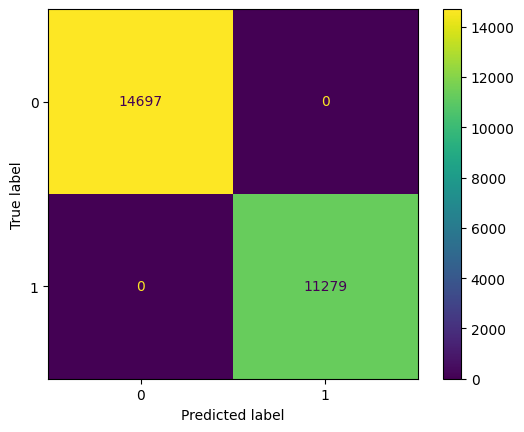

In [279]:
# Generate predictions with the best model
y_pred = best_gbm.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### h. Calculate the ROC curve and estimate the AUC 

GBM: ROC AUC=1.000


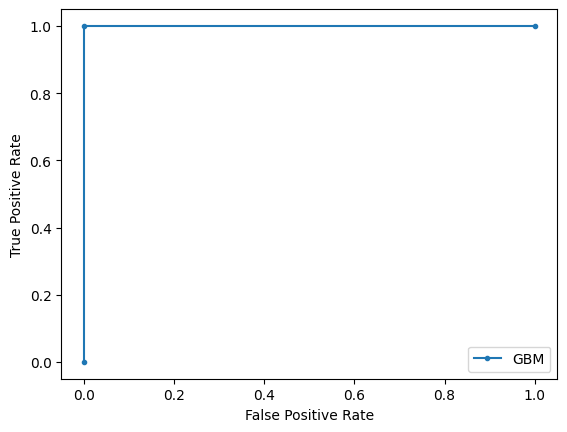

In [280]:
gbm_auc = roc_auc_score(y_test, y_pred)
# summarize scores
print('GBM: ROC AUC=%.3f' % (gbm_auc))
# calculate roc curves
gbm_fpr, gbm_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot(gbm_fpr, gbm_tpr, marker='.', label='GBM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### i. Plot feature/variable importance 

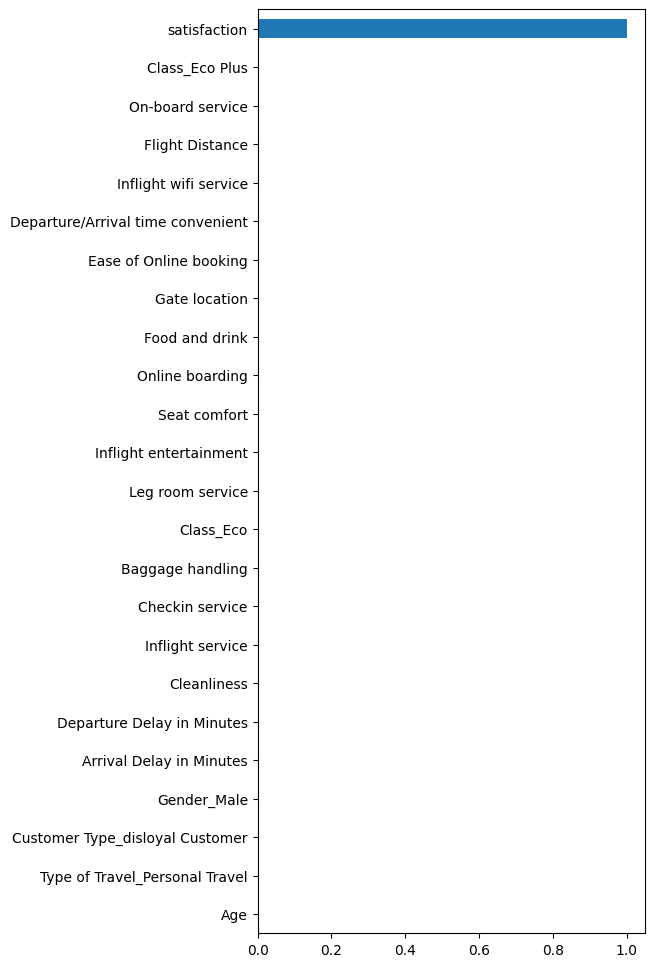

In [281]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_gbm.feature_importances_, index=X_train.columns).sort_values(ascending=True)

# Plot a simple bar chart
plt.figure(figsize=(5,12))
feature_importances.plot.barh();

### j. Provide a description of the results observed (i.e., performance results, improvement of optimized model over baseline model, parameters used for optimization, final best hyperparameters selected, variable importance, etc) 


### The Gradient Boosting Machine model has achieved a training and test accuracy of 1.0 (100%), indicating excellent predictions on the training data and flawless performance on unknown test data.
#### The precision, recall, and f1 scores in the analyses are all 1.0, indicating the remarkable performance of the model in distinguishing positive and negative cases.

The confusion matrix illustrates the categorization model's performance.

* The model had 11,279 true positive predictions.
* The model accurately identified 14,697 cases as negative, known as True Negatives (TN).
* There were zero false positives, meaning there were no cases mistakenly projected as    positive.
* There were no cases of false negatives, meaning no instances were mistakenly forecasted as negative.

*The model attained flawless accuracy by making no errors in its predictions.*

Also, An ROC AUC of 1.000 suggests that the model’s predictions are flawless.

This hyperparameter determines the number of decision trees in the random forest ensemble. the best value is 198, with 198 trees, the model can learn complex patterns in the data.

The learning rate determines the impact of each tree on the ultimate forecast. A reduced learning rate enhances the model's resilience but necessitates a greater number of trees. The best possible learning rate in this scenario is around 0.83, which is considered reasonably high.

The three criteria that influence customer satisfaction are Class Eco Plus, Onboard service, and Flight Distance, with Flight Distance having the most significant positive impact on customer satisfaction. Additional features like Age Type of Travel _Personal, and Customer Type_disloyal have minimal or insignificant impact.


# 16. eXtreme Gradient Boosting Machines (XGBoost)

### a. Develop baseline XGBoost model (using default parameters) using library xgboost and module

In [282]:
xgb_clf = xgb.XGBClassifier(objective="binary:logistic", random_state=416)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

### b. Estimate the model accuracy on the train sample and test sample 

In [283]:
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 416,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [284]:
print(confusion_matrix(y_test, y_pred))


[[14697     0]
 [    0 11279]]


In [285]:
y_pred = xgb_clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [286]:
y_pred_train = xgb_clf.predict(X_train)
y_pred_train

array([0, 0, 1, ..., 0, 0, 1])

In [287]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy on train:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy on test:",metrics.accuracy_score(y_test, y_pred))

Accuracy on train: 1.0
Accuracy on test: 1.0


### c. Estimate the precision, recall and f1-score on the test sample 

In [288]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("The precision for Tree is ",precision_score(y_test, y_pred))
print("The recall for Tree is ",recall_score(y_test, y_pred))

[[14697     0]
 [    0 11279]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14697
           1       1.00      1.00      1.00     11279

    accuracy                           1.00     25976
   macro avg       1.00      1.00      1.00     25976
weighted avg       1.00      1.00      1.00     25976

The precision for Tree is  1.0
The recall for Tree is  1.0


### d. Optimize the model by conducting hyperparameter tuning using 

In [289]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [290]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [291]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=416, eval_metric="auc")

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.5), # default 0.1
    "max_depth": randint(2, 8), # default 3
    "n_estimators": randint(100, 500), # default 100
    "subsample": uniform(0.6, 0.4)
}

tuning_xgb = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=416, n_iter=20, cv=5, verbose=1, n_jobs=1, return_train_score=True)

tuning_xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

report_best_scores(tuning_xgb.cv_results_, 1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[0]	validation_0-auc:0.97044
[1]	validation_0-auc:1.00000


[2]	validation_0-auc:1.00000
[3]	validation_0-auc:1.00000
[4]	validation_0-auc:1.00000
[5]	validation_0-auc:1.00000
[6]	validation_0-auc:1.00000
[7]	validation_0-auc:1.00000
[8]	validation_0-auc:1.00000
[9]	validation_0-auc:1.00000
[10]	validation_0-auc:1.00000
[11]	validation_0-auc:1.00000
[0]	validation_0-auc:0.97037
[1]	validation_0-auc:1.00000
[2]	validation_0-auc:1.00000
[3]	validation_0-auc:1.00000
[4]	validation_0-auc:1.00000
[5]	validation_0-auc:1.00000
[6]	validation_0-auc:1.00000
[7]	validation_0-auc:1.00000
[8]	validation_0-auc:1.00000
[9]	validation_0-auc:1.00000
[10]	validation_0-auc:1.00000
[11]	validation_0-auc:1.00000
[0]	validation_0-auc:0.97042
[1]	validation_0-auc:1.00000
[2]	validation_0-auc:1.00000
[3]	validation_0-auc:1.00000
[4]	validation_0-auc:1.00000
[5]	validation_0-auc:1.00000
[6]	validation_0-auc:1.00000
[7]	validation_0-auc:1.00000
[8]	validation_0-auc:1.00000
[9]	validation_0-auc:1.00000
[10]	validation_0-auc:1.00000
[11]	validation_0-auc:1.00000
[12]	val

### e. Estimate the model accuracy on the train sample and test sample 

In [292]:
y_pred = tuning_xgb.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

In [293]:
print('Best Parameter for XGB', tuning_xgb.best_params_, tuning_xgb.best_score_)


Best Parameter for XGB {'colsample_bytree': 0.813282844542053, 'gamma': 0.12401918141454243, 'learning_rate': 0.17948944848377021, 'max_depth': 6, 'n_estimators': 458, 'subsample': 0.9280883116140786} 1.0


### f. Estimate the precision, recall and f1-score on the test sample 

In [294]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("The precision for Tree is ",precision_score(y_test, y_pred))
print("The recall for Tree is ",recall_score(y_test, y_pred))

[[14697     0]
 [    0 11279]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14697
           1       1.00      1.00      1.00     11279

    accuracy                           1.00     25976
   macro avg       1.00      1.00      1.00     25976
weighted avg       1.00      1.00      1.00     25976

The precision for Tree is  1.0
The recall for Tree is  1.0


### g. Create the confusion matrix 

In [295]:
print(confusion_matrix(y_test, y_pred))

[[14697     0]
 [    0 11279]]


In [296]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("The precision for Tree is ",precision_score(y_test, y_pred))
print("The recall for Tree is ",recall_score(y_test, y_pred))

[[14697     0]
 [    0 11279]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14697
           1       1.00      1.00      1.00     11279

    accuracy                           1.00     25976
   macro avg       1.00      1.00      1.00     25976
weighted avg       1.00      1.00      1.00     25976

The precision for Tree is  1.0
The recall for Tree is  1.0


### h. Calculate the ROC curve and estimate the AUC 

XGB: ROC AUC=1.000


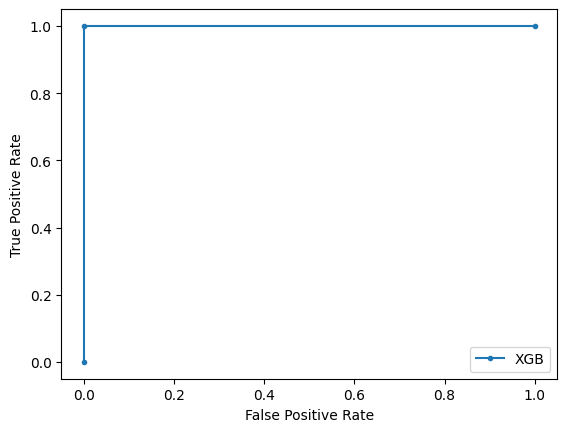

In [297]:
xgb_auc = roc_auc_score(y_test, y_pred)
# summarize scores
print('XGB: ROC AUC=%.3f' % (xgb_auc))
# calculate roc curves
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### i. Plot feature/variable importance 

In [298]:
best_xgb = tuning_xgb.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  tuning_xgb.best_params_)

Best hyperparameters: {'colsample_bytree': 0.813282844542053, 'gamma': 0.12401918141454243, 'learning_rate': 0.17948944848377021, 'max_depth': 6, 'n_estimators': 458, 'subsample': 0.9280883116140786}


In [299]:
tuning_xgb.best_estimator_


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.813282844542053, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0.12401918141454243,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.17948944848377021,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=458, n_jobs=None,
              num_parallel_tree=None, random_state=416, ...)

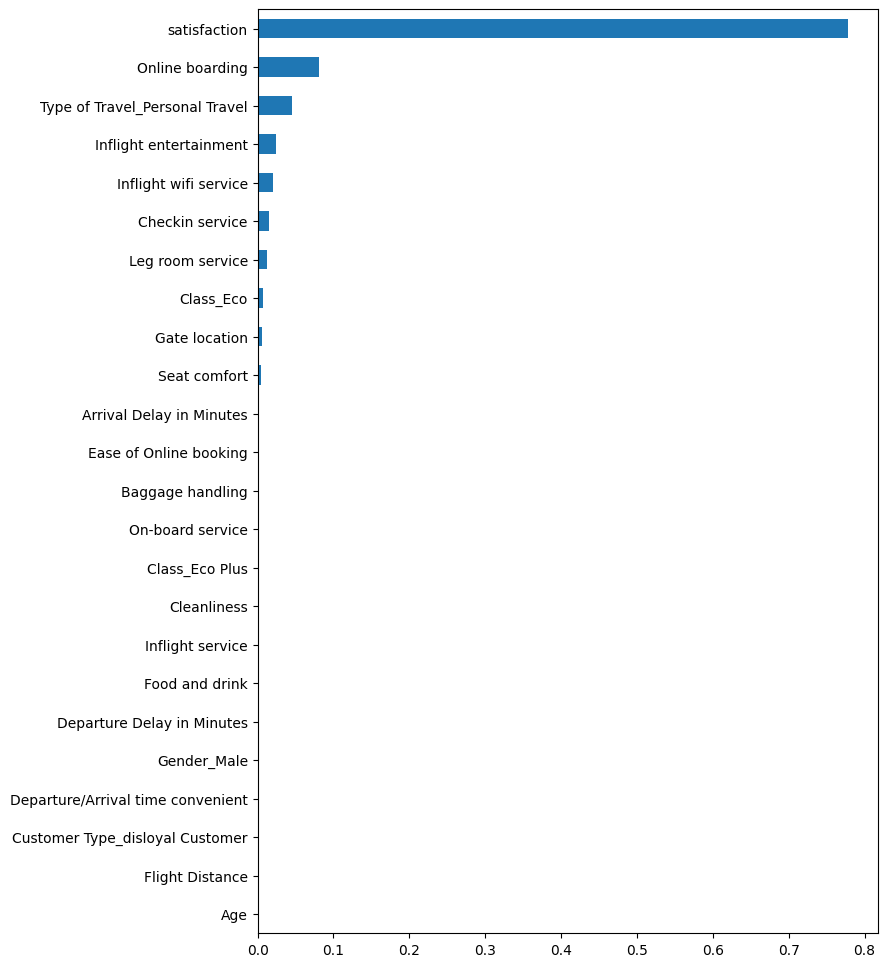

In [300]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=True)

# Plot a simple bar chart
plt.figure(figsize=(8,12))
feature_importances.plot.barh();

### j. Provide a description of the results observed (i.e., performance results, improvement of optimized model over baseline model, parameters used for optimization, final best hyperparameters selected, variable importance, etc) 

The eXtreme Gradient Boosting Machine achieves a model accuracy of 1.0 (100%) for both Training and Test datasets, indicating faultless prediction on the training data and flawless performance on unknown test data.

The precision, recall, and f1 score in the analyses are all 1.0, indicating remarkable performance of the model in distinguishing positive and negative cases.

The confusion matrix represents the performance of a classification model.

* True Positives (TP): The model correctly predicted 11,279 instances as positive.
* True Negatives (TN): The model correctly predicted 14,697 instances as negative.
* False Positives (FP): There were 0 instances incorrectly predicted as positive.
* False Negatives (FN): There were 0 instances incorrectly predicted as negative.

*The model achieved perfect accuracy because it made no mistakes in its predictions.*

Also, An ROC AUC of 1.000 suggests that the model’s predictions are flawless.
The optimal hyperparameter specifies the quantity of decision trees in the random forest ensemble. The optimal value is 458, which allows the model to comprehend intricate patterns within the dataset due to the presence of 458 trees.

A subset of 0.9280883116140786: This parameter determines the ratio of data utilized to train each tree. An importance score of 0.928 suggests that approximately 92.8% of the data is utilized for training each tree, aiding in decreasing variance within the ensemble.

The learning rate determines the impact of each tree on the ultimate forecast. A reduced learning rate enhances the model's resilience but necessitates a greater number of trees. The ideal learning rate in this scenario is around 0.17, indicating a modest pace of learning.

The factors that most significantly contribute to consumer satisfaction are Online boarding, Type of Travel_Personal, and Class_Eco. Gender, Departure/Arrival Time, and Gate location do not have a substantial impact on satisfaction.


### 17. Which model performed best and you recommend to the upper management of the company. Please compare the model performance and elaborate on your recommendation. 

The models in this research effectively made distinct classifications and identified attributes that are correlated with client pleasure. ROU AUC, confusion matrix, Precision, Recall, and F1-score all performed well, but the distinguishing feature was the learning curve and subsample ratio, where Extreme Gradient Boosting (XGBoost) outperformed the other models.

The model demonstrated a smaller learning curve of 0.179, indicating a higher accuracy in learning new data sets. It also included a higher subsample ratio of 0.92 (92.8%) and a greater number of estimators (Decision Tree) at 458, resulting in improved performance.

XGBoost is recognized for its high performance and efficiency, making it well-suited for managing big and intricate datasets. The system incorporates sophisticated regularization methods to mitigate overfitting. The system can efficiently incorporate fresh data and maintain peak performance in decision-making.

Overall, it is the optimal option for extensive machine learning applications because of its effectiveness in managing vast datasets. XGBoost's speed, robustness, and adaptability make it an attractive option for data-driven decision-making.
